In [9]:
import os
import requests
from PIL import Image
from io import BytesIO
from openpyxl import load_workbook

# Load your Excel workbook
wb = load_workbook(filename='output.xlsx')
ws = wb.active  # assuming you want the first sheet

# Create folders for classes
os.makedirs('C:\\Users\\SIT\\Desktop\\project\\editedimages\\0', exist_ok=True)
os.makedirs('C:\\Users\\SIT\\Desktop\\project\\editedimages\\1', exist_ok=True)

# Assuming URL is in column A and label is in column B
for index, row in enumerate(ws.iter_rows(min_row=2, values_only=True), start=1):  # skip header
    url, label = row
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        img_name = f'{index}.jpg'  # Use row number as image name
        img.save(f'C:\\Users\\SIT\\Desktop\\project\\editedimages\\{label}\\{img_name}')
        print(f'Successfully saved {img_name} in class {label} folder')
    except Exception as e:
        print(f'Failed to save image from {url} due to {str(e)}')


Successfully saved 1.jpg in class 0 folder
Successfully saved 2.jpg in class 0 folder
Successfully saved 3.jpg in class 0 folder
Successfully saved 4.jpg in class 0 folder
Successfully saved 5.jpg in class 0 folder
Successfully saved 6.jpg in class 0 folder
Successfully saved 7.jpg in class 0 folder
Successfully saved 8.jpg in class 0 folder
Successfully saved 9.jpg in class 0 folder
Successfully saved 10.jpg in class 0 folder
Successfully saved 11.jpg in class 0 folder
Successfully saved 12.jpg in class 0 folder
Successfully saved 13.jpg in class 0 folder
Successfully saved 14.jpg in class 0 folder
Successfully saved 15.jpg in class 0 folder
Successfully saved 16.jpg in class 0 folder
Successfully saved 17.jpg in class 0 folder
Successfully saved 18.jpg in class 0 folder
Successfully saved 19.jpg in class 0 folder
Successfully saved 20.jpg in class 0 folder
Successfully saved 21.jpg in class 0 folder
Successfully saved 22.jpg in class 0 folder
Successfully saved 23.jpg in class 0 fold

In [10]:
from PIL import Image
import os

def resize_images(source_dir, output_dir, size=(224, 224)):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        
    for filename in os.listdir(source_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img = Image.open(os.path.join(source_dir, filename))
            img = img.resize(size, Image.ANTIALIAS)
            img.save(os.path.join(output_dir, filename))

resize_images('C:\\Users\\SIT\\Desktop\\project\\editedimages\\0', 'C:\\Users\\SIT\\Desktop\\project\\editedimagess\\0')


C:\Users\SIT\AppData\Local\Temp\ipykernel_30364\3015341319.py:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(size, Image.ANTIALIAS)


In [11]:
from PIL import Image
import os

def resize_images(source_dir, output_dir, size=(224, 224)):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        
    for filename in os.listdir(source_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img = Image.open(os.path.join(source_dir, filename))
            img = img.resize(size, Image.ANTIALIAS)
            img.save(os.path.join(output_dir, filename))

resize_images('C:\\Users\\SIT\\Desktop\\project\\editedimages\\1', 'C:\\Users\\SIT\\Desktop\\project\\editedimagess\\1')


C:\Users\SIT\AppData\Local\Temp\ipykernel_30364\4029243093.py:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(size, Image.ANTIALIAS)


In [12]:
from keras.preprocessing.image import ImageDataGenerator

# Define your ImageDataGenerator instance
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Assuming you've your images stored in the directory: 'C:/Users/SIT/Desktop/project/editedimages'
train_dir = 'C:\\Users\\SIT\\Desktop\\project\\editedimagess'

# Use flow_from_directory method which allows you to read the images directly from the directory and augment them
train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),  # The dimensions to which all images found will be resized.
        batch_size=32,
        class_mode='binary')  # Since you have two classes (1 or 0 for their political view), use 'binary'

# Now, you can use `train_generator` as the input to your model's fit method
# model.fit(train_generator, steps_per_epoch=50, epochs=20)


Found 691 images belonging to 2 classes.


In [14]:
from keras.applications import MobileNet
from keras.models import Sequential
from keras.layers import Dense

# Load MobileNet without its top layers
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')

# Add a new top layer (Dense layer for binary classification)
model = Sequential()
model.add(base_model)
model.add(Dense(1, activation='sigmoid'))  # 'sigmoid' activation for binary classification

# Freeze the layers in base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, steps_per_epoch=21, epochs=20)


Epoch 1/20
21/21 [==============================] - 20s 862ms/step - loss: 0.7640 - accuracy: 0.5387
Epoch 2/20
21/21 [==============================] - 27s 1s/step - loss: 0.6688 - accuracy: 0.5964
Epoch 3/20
21/21 [==============================] - 26s 1s/step - loss: 0.6586 - accuracy: 0.6086
Epoch 4/20
21/21 [==============================] - 26s 1s/step - loss: 0.6483 - accuracy: 0.6313
Epoch 5/20
21/21 [==============================] - 26s 1s/step - loss: 0.6247 - accuracy: 0.6419
Epoch 6/20
21/21 [==============================] - 26s 1s/step - loss: 0.6357 - accuracy: 0.6237
Epoch 7/20
21/21 [==============================] - 26s 1s/step - loss: 0.6342 - accuracy: 0.6616
Epoch 8/20
21/21 [==============================] - 26s 1s/step - loss: 0.6250 - accuracy: 0.6495
Epoch 9/20
21/21 [==============================] - 26s 1s/step - loss: 0.6222 - accuracy: 0.6677
Epoch 10/20
21/21 [==============================] - 26s 1s/step - loss: 0.6127 - accuracy: 0.6677
Epoch 11/20
21/2

In [19]:
model.save('model2')

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


In [28]:
from PIL import Image
import os

def resize_images(source_dir, output_dir, size=(224, 224)):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        
    for filename in os.listdir(source_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img = Image.open(os.path.join(source_dir, filename))
            img = img.resize(size, Image.ANTIALIAS)
            img.save(os.path.join(output_dir, filename))

resize_images('C:\\Users\\SIT\\Desktop\\project\\validation_images\\0', 'C:\\Users\\SIT\\Desktop\\project\\validation_images\\0')


C:\Users\SIT\AppData\Local\Temp\ipykernel_30364\3220911692.py:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(size, Image.ANTIALIAS)


In [29]:
# Define your validation data generator
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_dir = 'C:\\Users\\SIT\\Desktop\\project\\validation_images'  # replace with your actual validation images directory

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

# Fit the model and get the history
history = model.fit(train_generator, steps_per_epoch=2, epochs=20,
                    validation_data=validation_generator)

# Print the final training loss and accuracy
print('Final training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1])

# Print the final validation loss and accuracy
print('Final validation loss \t', history.history['val_loss'][-1])
print('Final validation accuracy ', history.history['val_accuracy'][-1])


Found 62 images belonging to 2 classes.


Epoch 1/20
5/5 [==============================] - 6s 1s/step - loss: 0.5625 - accuracy: 0.7312 - val_loss: 1.1270 - val_accuracy: 0.5000
Epoch 2/20
5/5 [==============================] - 6s 1s/step - loss: 0.5483 - accuracy: 0.7211 - val_loss: 1.1116 - val_accuracy: 0.5000
Epoch 3/20
5/5 [==============================] - 6s 1s/step - loss: 0.5436 - accuracy: 0.7250 - val_loss: 1.1488 - val_accuracy: 0.5000
Epoch 4/20
5/5 [==============================] - 9s 2s/step - loss: 0.4865 - accuracy: 0.7812 - val_loss: 1.1285 - val_accuracy: 0.5000
Epoch 5/20
5/5 [==============================] - 11s 2s/step - loss: 0.5772 - accuracy: 0.7063 - val_loss: 1.1843 - val_accuracy: 0.5000
Epoch 6/20
5/5 [==============================] - 10s 2s/step - loss: 0.5622 - accuracy: 0.7500 - val_loss: 1.2160 - val_accuracy: 0.5000
Epoch 7/20
5/5 [==============================] - ETA: 0s - loss: 0.5750 - accuracy: 0.6750

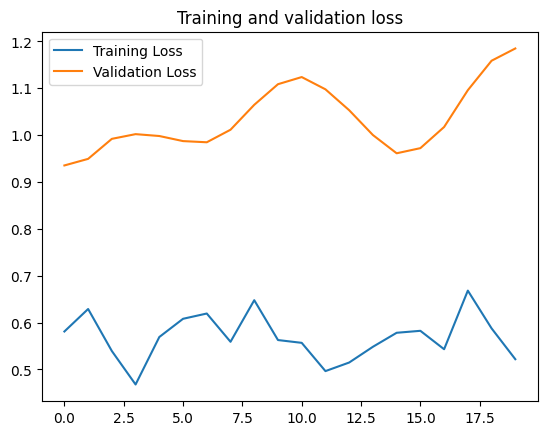

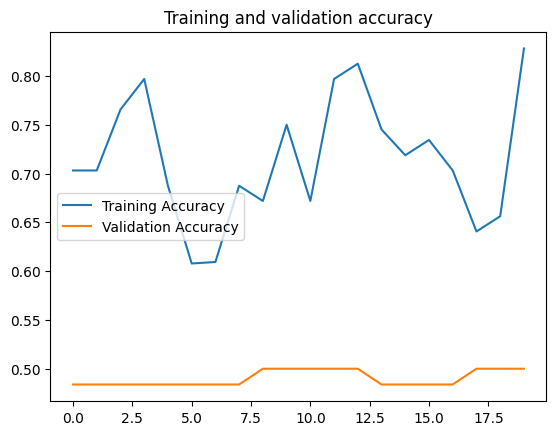

In [26]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

# Plotting the training and validation accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
